<a href="https://colab.research.google.com/github/Ankita-Payal/Machine-Learning/blob/main/K_Means_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("/content/drive/MyDrive/ML-clg/Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

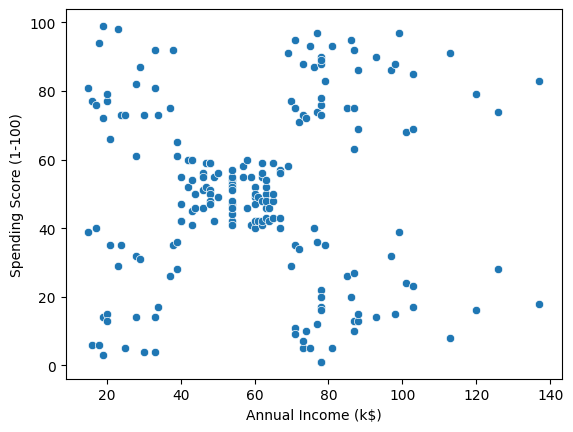

In [12]:
sns.scatterplot( x='Annual Income (k$)',y='Spending Score (1-100)',data=data,legend='full')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

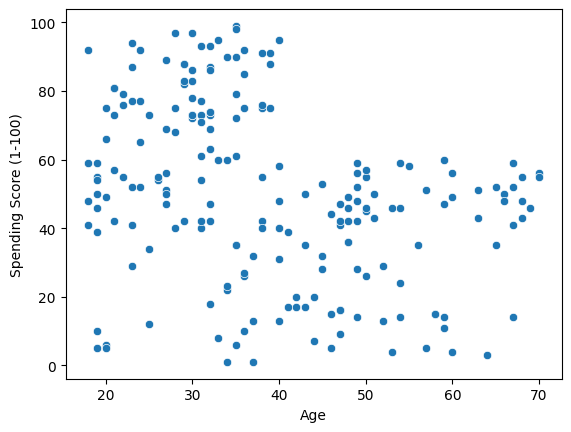

In [13]:
sns.scatterplot( x='Age',y='Spending Score (1-100)',data=data,legend='full')

In [14]:
from sklearn.cluster import KMeans

In [15]:
new_data=data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [16]:
new_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [17]:
!pip install yellowbrick

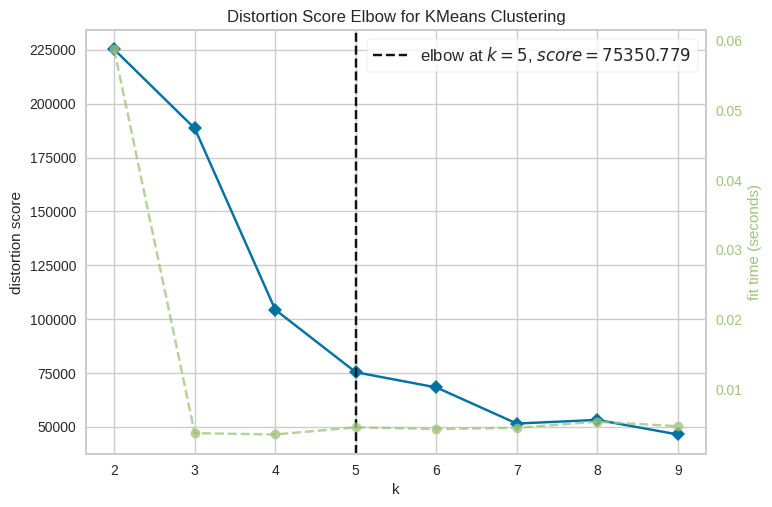

In [19]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=1)

visulalizer=KElbowVisualizer(model,k=(2,10))

visulalizer.fit(new_data)
visulalizer.show()
plt.show()


In [20]:
kms =KMeans(n_clusters=5,init='k-means++').fit(new_data)
km=new_data.copy()
km.loc[:,'Cluster']=kms.labels_

In [21]:
km

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,3
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

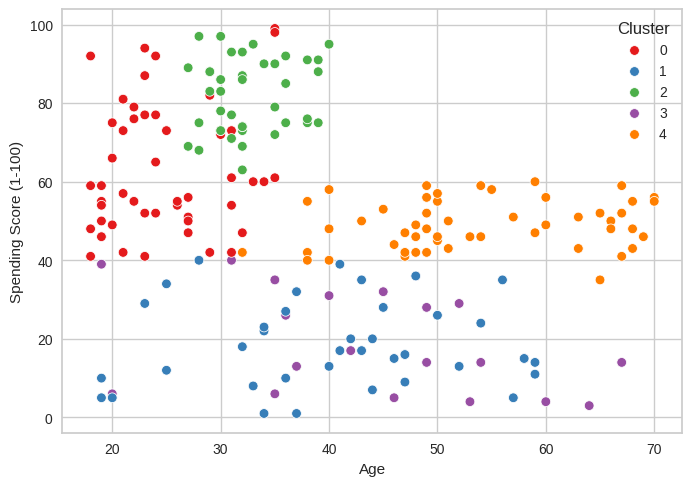

In [24]:
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=km,
    legend='full',
    hue='Cluster',
    palette='Set1'
)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

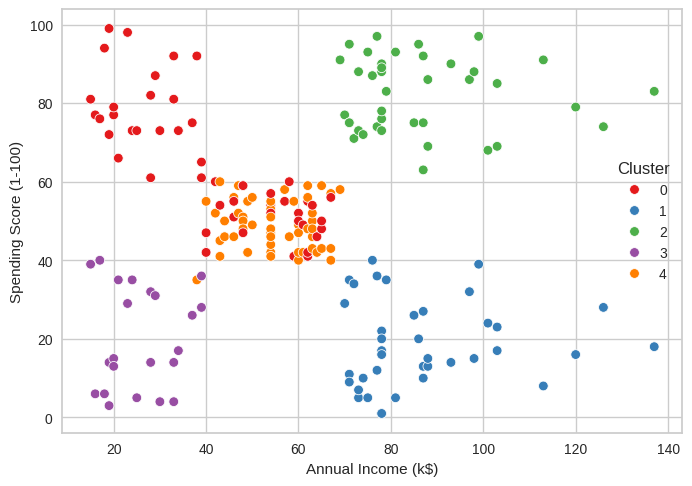

In [27]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=km,
    legend='full',
    hue='Cluster',
    palette='Set1'
)

In [32]:
# Get the feature names in the same order KMeans saw them
features = new_data.columns

print(features)
# Example output: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Now cluster_centers_ columns correspond to these features in order


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


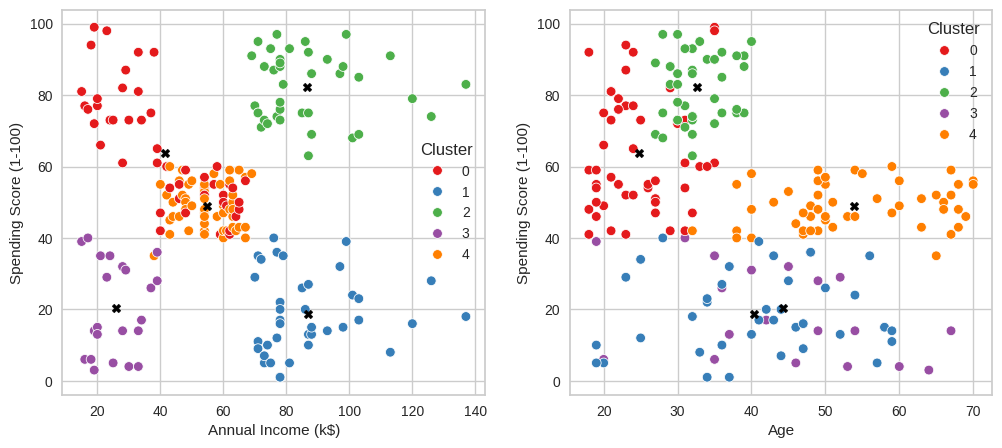

In [33]:
fig1,axes=plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=km,
    legend='full',
    hue='Cluster',
    ax=axes[0],
    palette='Set1'
)

sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=km,
    legend='full',
    hue='Cluster',
    ax=axes[1],
    palette='Set1'
)

# First plot: Annual Income vs Spending Score
axes[0].scatter(
    kms.cluster_centers_[:, features.get_loc('Annual Income (k$)')],
    kms.cluster_centers_[:, features.get_loc('Spending Score (1-100)')],
    s=40, c='black', marker='X'
)

# Second plot: Age vs Spending Score
axes[1].scatter(
    kms.cluster_centers_[:, features.get_loc('Age')],
    kms.cluster_centers_[:, features.get_loc('Spending Score (1-100)')],
    s=40, c='black', marker='X'
)


plt.show()